**Accessing and creating content**

Sourcecode [developers.arcgis.com](https://developers.arcgis.com/python/guide/accessing-and-creating-content/).


In [1]:
import os
import shutil
import datetime as dt
import pandas 
from arcgis.gis import GIS

In [7]:
 print("ArcGIS Online Org account")    
 gis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123")
 print("Logged in as " + str(gis.properties.user.username))

ArcGIS Online Org account
Logged in as arcgis_python


In [23]:
search_result = gis.content.search(query="title:Esri", item_type="Feature Layer")
search_result

[<Item title:"Esri Regional Offices US" type:Feature Layer Collection owner:api_data_owner>]

In [27]:
search_my_contents = gis.content.search(query="owner:arcgis_python", 
                                        item_type="Feature *")
search_my_contents

[<Item title:"New York" type:Feature Layer Collection owner:arcgis_python>]

In [28]:
search_result_USA = gis.content.search(query="title:USA*")                  
search_result_USA

[<Item title:"2018 USA Tapestry Segmentation" type:Map Image Layer owner:api_data_owner>,
 <Item title:"USA zip code boundaries 2017" type:Feature Layer Collection owner:api_data_owner>]

In [26]:
# search and list all feature layers in my contents
search_result = gis.content.search(query="", item_type="Feature Layer")
search_result

[<Item title:"Esri Regional Offices US" type:Feature Layer Collection owner:api_data_owner>,
 <Item title:"grazing allotments and watersheds" type:Feature Layer Collection owner:api_data_owner>,
 <Item title:"New York" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"CrimeAnalysisData" type:Feature Layer Collection owner:api_data_owner>,
 <Item title:"Seattle Bike Routes" type:Feature Layer Collection owner:api_data_owner>,
 <Item title:"SeattleBikeRoutes" type:Feature Layer Collection owner:api_data_owner>,
 <Item title:"conda_download" type:Feature Layer Collection owner:yjiang_geosaurus>,
 <Item title:"SanDiegoColleges" type:Feature Layer Collection owner:api_data_owner>,
 <Item title:"Merge2" type:Feature Layer Collection owner:api_data_owner>,
 <Item title:"ViolentCrimeTrends" type:Feature Layer Collection owner:api_data_owner>]

In [32]:
 # search for content that begin with a prefix - say 'USA'
search_result_USA = gis.content.search(query="title:US*", outside_org=True)                  
search_result_USA

[<Item title:"USA Food Expenditures at Home vs. Away from Home" type:Web Map owner:jimhe>,
 <Item title:"2018-2023 USA Population Growth" type:Map Image Layer owner:esri>,
 <Item title:"USA Census Populated Places" type:Feature Layer Collection owner:esri>,
 <Item title:"2018 USA Retail Goods Spending" type:Map Image Layer owner:esri>,
 <Item title:"USA Core Based Statistical Area" type:Feature Layer Collection owner:esri>,
 <Item title:"An Introduction to the USGS Historical Topographic Map Collection" type:Web Mapping Application owner:esri_historical>,
 <Item title:"2019 USA Property Crime" type:Map Image Layer owner:esri>,
 <Item title:"USA State Plane Zones" type:Layer Package owner:esri_dm>,
 <Item title:"USA Wildfire Activity" type:Map Image Layer owner:esri>,
 <Item title:"USA Population Density" type:Map Image Layer owner:AtlasPublisher>]

<Item title:"USA Food Expenditures at Home vs. Away from Home" type:Web Map owner:jimhe>
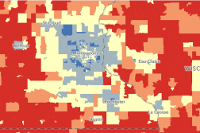

<Item title:"2018-2023 USA Population Growth" type:Map Image Layer owner:esri>
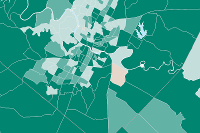

<Item title:"USA Census Populated Places" type:Feature Layer Collection owner:esri>
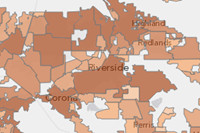

<Item title:"2018 USA Retail Goods Spending" type:Map Image Layer owner:esri>
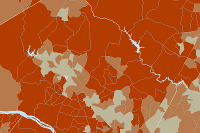

<Item title:"USA Core Based Statistical Area" type:Feature Layer Collection owner:esri>
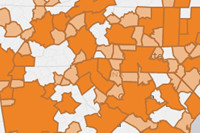

<Item title:"An Introduction to the USGS Historical Topographic Map Collection" type:Web Mapping Application owner:esri_historical>
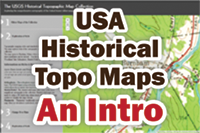

<Item title:"2019 USA Property Crime" type:Map Image Layer owner:esri>
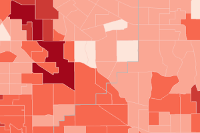

<Item title:"USA State Plane Zones" type:Layer Package owner:esri_dm>
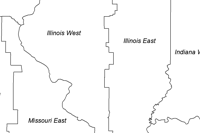

<Item title:"USA Wildfire Activity" type:Map Image Layer owner:esri>
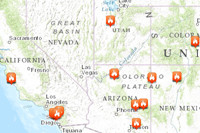

<Item title:"USA Population Density" type:Map Image Layer owner:AtlasPublisher>
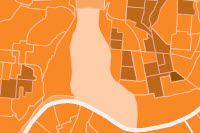

In [33]:
#you can utilize the rich representation of items for your query results.
from IPython.display import display
for item in search_result_USA:
    display(item)

In [34]:
# lets get the itemid of first item from previous query
first_item = search_result_USA[0]
known_item_id = first_item.id
print(known_item_id)

b69d3dbfe28b4bf89a92a2e431b9ab7a


<Item title:"USA Food Expenditures at Home vs. Away from Home" type:Web Map owner:jimhe>
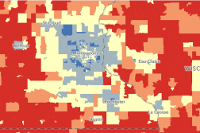

In [35]:
# lets use the get() to access this item
online_historic_item = gis.content.get(known_item_id)
online_historic_item


***Searching for content in ArcGIS Online***

So far, we searched for content accessible to a user logged into ArcGIS Enterprise. Let's connect directly to an ArcGIS Online Organization and futher explore ways to search for web GIS content.


<Item title:"WorldPop_MTO" type:Web Scene owner:holistic_user05>

<Item title:"SUROCCI_21_04_2019" type:Web Scene owner:ggi.idebar>
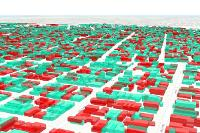

<Item title:"WebViewerMedWorkflows - CC Default Web GIS - Capital City (3D) (prod) (prod)" type:Web Scene owner:hanspetter.winsnes@geodata.no_Geodata>

<Item title:"printing-portal-item - Default Web GIS - Capital City (3D) (prod)" type:Web Scene owner:hswan_Latitudegeo>

<Item title:"Copy of Visualize New Developments by esri_3d" type:Web Scene owner:frankie.kong_arup>

<Item title:"WorldPop20190612" type:Web Scene owner:holistic_user17>

<Item title:"WorldPop19943" type:Web Scene owner:susantran>

<Item title:"3D Cities - Nederland" type:Web Scene owner:osgpiterjelleslocatiedefoorakker_admin>
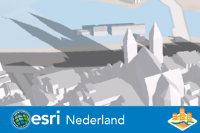

<Item title:"WorldPop_test" type:Web Scene owner:holistic_user19>

<Item title:"BARRANQUILLA_14_04_2019" type:Web Scene owner:ggi.idebar>
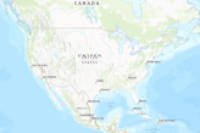

<Item title:"Virginia Cities CTA" type:Web Scene owner:2017fairfax226>
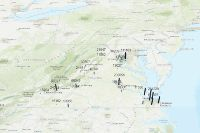

<Item title:"WorldPopy" type:Web Scene owner:holistic_user01>

<Item title:"SURORIENTE_21_04_2019" type:Web Scene owner:ggi.idebar>
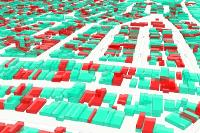

<Item title:"WorldPop_chklist_2" type:Web Scene owner:holistic_user18>

<Item title:"TestWS_WorldPop" type:Web Scene owner:cliuprotest3>

In [38]:
public_3d_city_scenes = gis.content.search(query="3d cities", item_type = "web scene",
                                           sort_field="numViews" ,sort_order="asc",
                                           max_items = 15, outside_org=True)
for item in public_3d_city_scenes:
    display(item)